# Plots

One of the most amazing feature of hist is it's powerful plotting family. Here you can see how to plot Hist.

In [1]:
from hist import Hist
import hist

In [2]:
h = Hist(
    hist.axis.Regular(50, -5, 5, name="S", label="s [units]", flow=False),
    hist.axis.Regular(50, -5, 5, name="W", label="w [units]", flow=False),
)

In [3]:
import numpy as np

s_data = np.random.normal(size=100_000) + np.ones(100_000)
w_data = np.random.normal(size=100_000)

# normal fill
h.fill(s_data, w_data)

Hist(
  Regular(50, -5, 5, underflow=False, overflow=False, name='S', label='s [units]'),
  Regular(50, -5, 5, underflow=False, overflow=False, name='W', label='w [units]'),
  storage=Double()) # Sum: 99997.0

## Via Matplotlib

hist allows you to plot via [Matplotlib](https://matplotlib.org/) like this:

In [4]:
import matplotlib.pyplot as plt

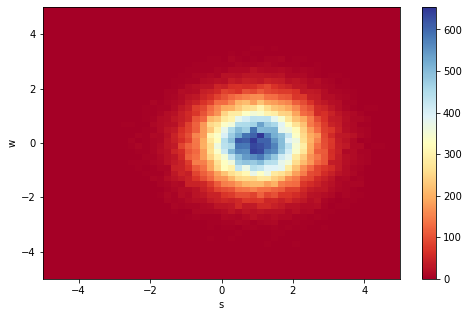

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
w, x, y = h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T, cmap="RdYlBu")
ax.set_xlabel("s")
ax.set_ylabel("w")
fig.colorbar(mesh)
plt.show()

## Via Mplhep

[mplhep](https://github.com/scikit-hep/mplhep) is an important visualization tools in Scikit-Hep ecosystem. hist has integrate with mplhep and you can also plot using it. If you want more info about mplhep please visit the official repo to see it.

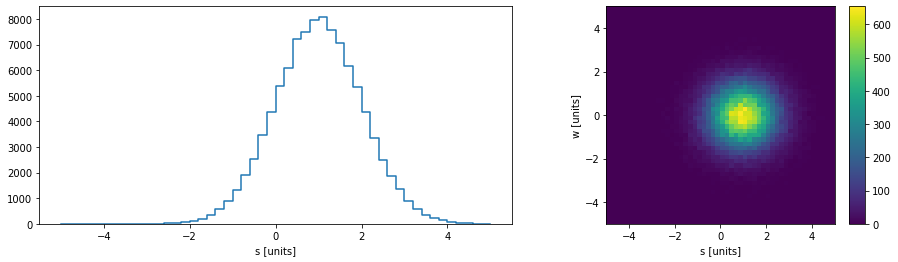

In [6]:
import mplhep

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
mplhep.histplot(h.project("S"), ax=axs[0])

mplhep.hist2dplot(h, ax=axs[1])

plt.show()

## Via Plot

Hist has plotting methods for 1-D and 2-D histograms, `.plot1d()` and `.plot2d()` respectively. It also provides `.plot()` for plotting according to the its dimension. Moreover, to show the projection of each axis, you can use `.plot2d_full()`. If you have a Hist with higher dimension, you can use `.project()` to extract two dimensions to see it with our plotting suite.

Our plotting methods are all based on Matplotlib, so you can pass Matplotlib's `ax` into it, and hist will draw on it. We will create it for you if you do not pass them in.

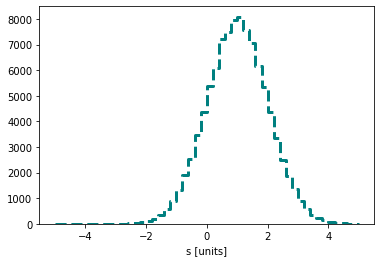

In [7]:
# plot1d
fig, ax = plt.subplots(figsize=(6, 4))


h.project("S").plot1d(ax=ax, ls="--", c="teal", lw=3)
plt.show()

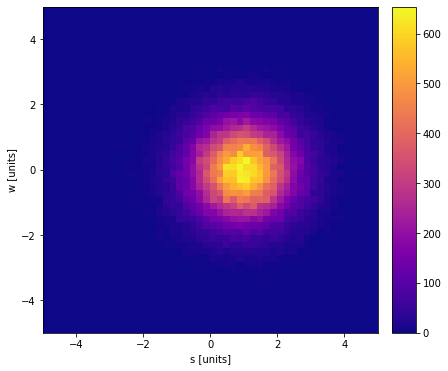

In [8]:
# plot2d
fig, ax = plt.subplots(figsize=(6, 6))

h.plot2d(ax=ax, cmap="plasma")
plt.show()

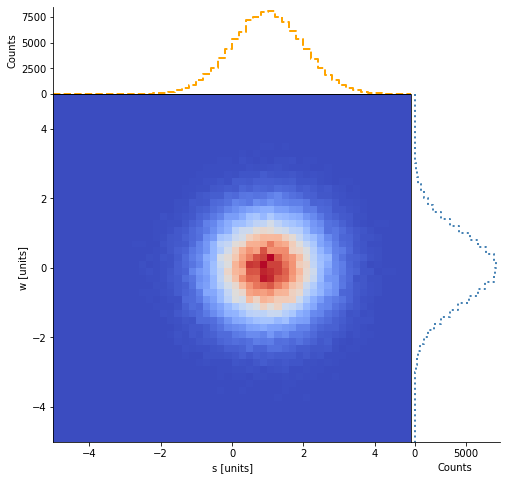

In [9]:
# plot2d_full
plt.figure(figsize=(8, 8))

h.plot2d_full(
    main_cmap="coolwarm",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)

plt.show()

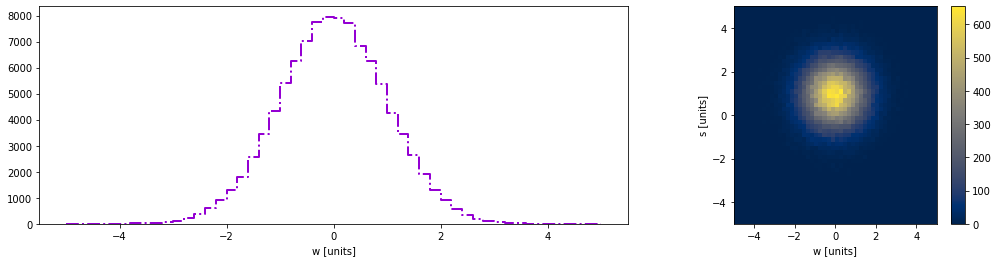

In [10]:
# auto-plot
fig, axs = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={"width_ratios": [5, 4]})


h.project("W").plot(ax=axs[0], c="darkviolet", lw=2, ls="-.")
h.project("W", "S").plot(ax=axs[1], cmap="cividis")

plt.show()

## Via Plot Pull

Pull plot is commonly used in HEP studies, we provide a method for this specific type of plot called `.plot_pull()`, where you can pass in a Callable object and then we could fit it on the plot.

In [11]:
from uncertainties import unumpy as unp


def pdf(x, a=1 / np.sqrt(2 * np.pi), x0=0, sigma=1, offset=0):
    exp = unp.exp if a.dtype == np.dtype("O") else np.exp
    return a * exp(-((x - x0) ** 2) / (2 * sigma ** 2)) + offset

*(The uncertainty is non-significant as we filled a great quantities of observation points above.)*

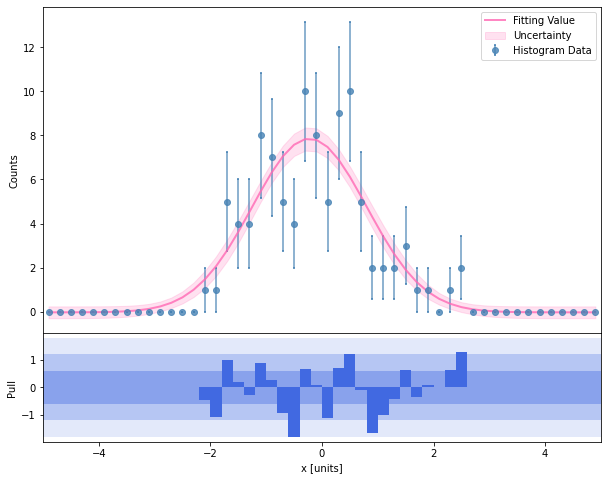

In [12]:
plt.figure(figsize=(10, 8))

hh = hist.Hist(
    hist.axis.Regular(
        50, -5, 5, name="X", label="x [units]", underflow=False, overflow=False
    )
).fill(np.random.normal(size=100))

ax, pull_ax = hh.plot_pull(
    pdf,
    eb_ecolor="steelblue",
    eb_mfc="steelblue",
    eb_mec="steelblue",
    eb_fmt="o",
    eb_ms=6,
    eb_capsize=1,
    eb_capthick=2,
    eb_alpha=0.8,
    fp_c="hotpink",
    fp_ls="-",
    fp_lw=2,
    fp_alpha=0.8,
    bar_fc="royalblue",
    pp_num=3,
    pp_fc="royalblue",
    pp_alpha=0.618,
    pp_ec=None,
    ub_alpha=0.2,
)

plt.show()